<a href="https://colab.research.google.com/github/DylanMR08/Practica_Py_Git/blob/main/HidrocecMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ee
import geemap
import pandas as pd
from IPython.display import Image

In [ ]:
ee.Authenticate()
ee.Initialize(project="ee-dylanmejiaruiz6")

In [ ]:
coordinates = [
    [-85.08966367400666, 9.563581311671118],
    [-84.60214536345978, 9.570352268237277],
    [-84.61999814666291, 9.778831216499185],
    [-84.76144712127228, 9.993941840356362],
    [-85.23660581267853, 10.257562286532712],
    [-85.28467099822541, 10.207558691261006],
    [-85.23111264861603, 10.088599715058134],
    [-85.10202329314728, 9.96824422168374],
    [-84.92624204314728, 9.918195681340592],
    [-85.08142392791291, 9.642116095590204],
    [-85.08966367400666, 9.563581311671118]
]

# Crea una geometria de poligono para el Golfo de Nicoya
golfoNicoyaGeometry = ee.Geometry.Polygon(coordinates)

Map = geemap.Map(center=[10.076804181773133, -85.07525621101922], zoom=12)

dataset = (
    ee.ImageCollection('JAXA/GCOM-C/L3/OCEAN/CHLA/V3')
    .filterDate('2023-11-01', '2023-11-24')
    .filter(ee.Filter.eq('SATELLITE_DIRECTION', 'D'))
    .filterBounds(golfoNicoyaGeometry)
)


count = dataset.size()
print('Numero de imagenes del Golfo de Nicoya:', count.getInfo())
vis = {
        'bands': ['CHLA_AVE'],
        'min': 0,
        'max': 2,
          'palette': [
            '3500a8', '0800ba', '003fd6',
            '00aca9', '77f800', 'ff8800',
            'b30000', '920000', '880000'
        ]
    }
if count.getInfo() > 0:
    # Multiplica por el coeficiente de pendiente y toma el logaritmo en base 10
    image = dataset.mean().multiply(0.0016).log10()
 # Añade la capa al mapa
    Map.addLayer(image, vis, 'Chlorophyll-a concentration')
else:
    print('No hay imágenes en la región del Golfo de Nicoya.')

image_list = dataset.toList(dataset.size())

geometry2 = ee.Geometry.Polygon(coordinates)

dataset = ee.ImageCollection('JAXA/GCOM-C/L3/OCEAN/CHLA/V3')\
    .filterBounds(geometry2)\
    .filterDate('2023-08-27', '2023-09-20')\
    .filter(ee.Filter.eq('SATELLITE_DIRECTION', 'D'))\
    .filter(ee.Filter.Or(ee.Filter.eq('PROCESSING_RESULT', 'Fair'), ee.Filter.eq('PROCESSING_RESULT', 'Good')))
meanImage = dataset.mean()


scaledImage = meanImage.multiply(0.0016).log10()
clippedImage = scaledImage.clip(geometry2)
# task = ee.batch.Export.image.toDrive(**{
#     'image': clippedImage,
#     'description': 'imagen_recorta',
#     'dimensions': clippedImage.getInfo()['bands'][0]['dimensions'],
#     'crs': clippedImage.getInfo()['bands'][0]['crs'],
#     'crs_transform':clippedImage.getInfo()['bands'][0]['crs_transform'],
#     'scale': 30,  # Especifica la escala en metros
#     'region': geometry2.getInfo()['coordinates'],  # Define la región
#     'fileFormat': 'GEO_TIFF'
# })
# print(clippedImage.getInfo())
# # Iniciar la tarea de exportación
# task.start()
# print(task.status())
Map.centerObject(geometry2, 10);
Map.addLayer(clippedImage, vis, 'Imagen Recortada')
Map

Numero de imagenes del Golfo de Nicoya: 23


Map(center=[9.84960308913486, -84.90584591608358], controls=(WidgetControl(options=['position', 'transparent_b…

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Información de la imagen:
Ancho: 2534
Alto: 2576
Número de bandas: 2


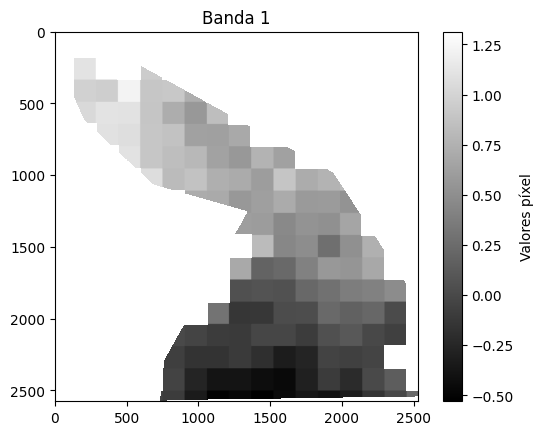

In [ ]:
from google.colab import drive
from osgeo import gdal
import matplotlib.pyplot as plt
drive.mount('/content/drive')

# Ruta al archivo de imagen exportado en tu Google Drive
file_path = '/content/drive/My Drive/imagen_recortada.tif'
# Ruta al archivo de imagen exportado en tu Google Drive

# Leer la imagen usando gdal
ds = gdal.Open(file_path)

# Obtener información sobre la imagen
print("Información de la imagen:")
print("Ancho:", ds.RasterXSize)
print("Alto:", ds.RasterYSize)
print("Número de bandas:", ds.RasterCount)

# Leer datos de la banda 1
band1 = ds.GetRasterBand(1).ReadAsArray()

# Visualizar la banda usando matplotlib
plt.imshow(band1, cmap='gray')  # Muestra la primera banda en escala de grises
plt.title('Banda 1')
plt.colorbar(label='Valores píxel')
plt.show()

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


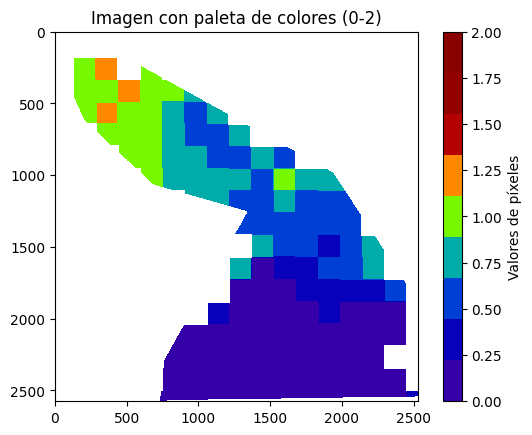

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

# Supongamos que tus datos están en el rango original de 0 a x
# Normalizar los datos para que estén entre 0 y 2
min_val = 0  # Valor mínimo original de la imagen
max_val = 2  # Valor máximo original de la imagen (reemplaza con el valor correcto)

normalized_band = (band1 - min_val) / (max_val - min_val) * 2  # Normalizar a rango de 0 a 2
print(band1)
# Definir la paleta de colores
palette = [
    '#3500a8', '#0800ba', '#003fd6',
    '#00aca9', '#77f800', '#ff8800',
    '#b30000', '#920000', '#880000'
]

# Crear un mapa de colores personalizado
cmap = ListedColormap(palette)

# Crear la visualización de la imagen con el nuevo rango de colores
plt.imshow(normalized_band, cmap=cmap, vmin=0, vmax=2)  # Establecer límites de visualización de 0 a 2
plt.title('Imagen con paleta de colores (0-2)')
plt.colorbar(label='Valores de píxeles')
plt.axis('on')  # Activar los ejes
plt.show()


In [ ]:
np.set_printoptions(threshold=np.inf)

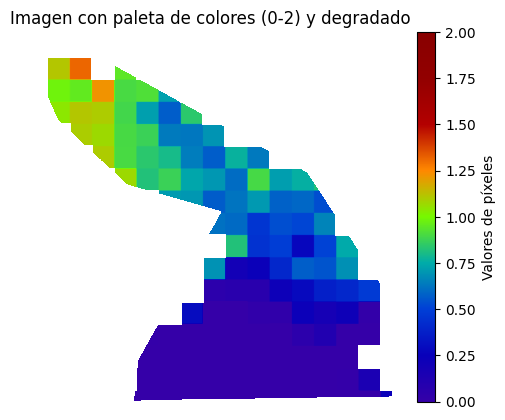

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

# Normalizar los datos para que estén entre 0 y 2
min_val = 0
max_val = 2

# Normalizar a rango de 0 a 2
normalized_band = (band1 - min_val) / (max_val - min_val) * 2

palette = [
    '#3500a8', '#0800ba', '#003fd6',
    '#00aca9', '#77f800', '#ff8800',
    '#b30000', '#920000', '#880000'
]

# Crear un mapa de colores personalizado con degradado
interpolated_colors = []
n = len(palette) - 1
for i in range(n):
    start_color = np.array(list(int(palette[i][j:j+2], 16) for j in (1, 3, 5)))
    end_color = np.array(list(int(palette[i+1][j:j+2], 16) for j in (1, 3, 5)))
    for j in np.linspace(0, 1, 100):
        new_color = tuple((1 - j) * start_color + j * end_color)
        interpolated_colors.append('#%02x%02x%02x' % tuple(np.round(new_color).astype(int)))

cmap = ListedColormap(interpolated_colors)

# Crear la visualización de la imagen con el nuevo rango de colores y degradado
plt.imshow(normalized_band, cmap=cmap, vmin=0, vmax=2)
plt.title('Imagen con paleta de colores (0-2) y degradado')
plt.colorbar(label='Valores de píxeles')
plt.axis('off')
plt.show()


In [ ]:
print(len(normalized_band))